Razumevanje strukture online diskusije: mrežna analiza Twitter razgovora o COVID-19 pandemiji

Uvod:

Savremeni informacioni prostor, posebno na društvenim mrežama, karakteriše izuzetno brz protok informacija, ali i sve veću prisutnost dezinformacija i manipulativnog sadržaja. Tokom kriznih perioda, kao što je bila pandemija virusa COVID-19, intenzitet razmene informacija dodatno je rastao, dok je istovremeno opadala mogućnost korisnika da pouzdano procene tačnost i kredibilitet dostupnih informacija.

Jedan od ključnih izazova u analizi komunikacije na društvenim mrežama jeste razlikovanje organske javne rasprave, koja nastaje spontano kroz interakcije stvarnih korisnika, od koordinisanog ponašanja, koje često uključuje automatizovane naloge (botove) ili organizovane grupe korisnika sa unapred definisanim ciljevima. Takvi oblici delovanja se manifestuju, ne samo kroz sadržaj pojedinačnih poruka, već i kroz strukturu i obrasce interakcije unutar mreže, što čini mrežnu analizu posebno pogodnim alatom za njihovo otkrivanje.

Cilj ovog rada jeste da se primenom, metoda mrežne analize podataka, ispita upravo struktura komunikacije na društvenoj mreži Twitter, kako bi se utvrdilo da li posmatrana mreža pokazuje karakteristike organske javne rasprave ili obrasce koji mogu ukazivati na koordinisano ponašanje.

Skup podataka korišćen u ovom radu preuzet je sa javne platforme Kaggle i obuhvata podatke prikupljene sa društvene mreže Twitter u kontekstu diskusija vezanih za pandemiju COVID-19 na području Indije. Podaci su prikupljeni i prethodno obrađeni od strane autora dataset-a, a detaljan opis, kao i sam dataset, dostupni su na sledećem linku: https://www.kaggle.com/datasets/abhishek252/covid19-tweets-dataset.

Za konstrukciju i analizu mreže korišćena je Python biblioteka NetworkX, koja omogućava efikasno izračunavanje standardnih mrežnih metrika, poput posredništva, centralnosti i modularnosti. Vizuelni prikaz mreže realizovan je pomoću biblioteke PyVis, izabrane zbog mogućnosti interaktivnog prikaza strukture mreže i lakšeg uočavanja obrazaca povezanosti. Ovakav metodološki pristup odabran je jer omogućava kvantitativnu analizu topologije mreže i identifikaciju strukturnih karakteristika koje mogu doprineti donošenju krajnjeg zaključka.

In [ ]:
from pathlib import Path
from collections import defaultdict

import pandas as pd

import matplotlib.pyplot as plt

import networkx as nx

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myPath = '/content/drive/MyDrive/NAP/Tweeter_Data_IN.csv'
data = pd.read_csv(myPath)
data.head()

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44179 entries, 0 to 44178
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   created_at             44179 non-null  object
 1   hashtags               17907 non-null  object
 2   favorite_count         44179 non-null  int64 
 3   id                     44179 non-null  int64 
 4   lang                   44179 non-null  object
 5   place                  44162 non-null  object
 6   retweet_count          44179 non-null  int64 
 7   text                   44179 non-null  object
 8   tweet_url              44179 non-null  object
 9   user_screen_name       44179 non-null  object
 10  user_description       37905 non-null  object
 11  user_favourites_count  44179 non-null  int64 
 12  user_followers_count   44179 non-null  int64 
 13  user_friends_count     44179 non-null  int64 
 14  user_listed_count      44179 non-null  int64 
 15  user_location      

U ovim koracima učitani su podaci iz CSV fajla koji sadrži informacije o autorima tvitova, tekstualnom sadržaju objava i vremenu njihovog objavljivanja. Nakon učitavanja podataka izvršen je osnovni pregled strukture skupa podataka.

In [ ]:
data['user_screen_name'].value_counts()
#Grupisane obajve po jedinstvenom imenu autora
#22447 jedinstvenih vrednosti, najučestaliji korisnik sirajnoorani

,count
user_screen_name,
sirajnoorani,116
sidhant,106
spsurana90,98
mahajan1bhushan,84
raj2jas,81
...,...
bahuvirupak,1
_whosane_,1
change_thinker,1


Na osnovu tekstualnog sadržaja tvitova identifikovana su pominjanja drugih korisnika pri čemu je svako pominjanje korisnika označeno simbolom @. Ova pominjanja su korišćena za formiranje usmerene mreže interakcija, gde čvorovi predstavljaju korisnike, a usmerene ivice označavaju komunikaciju od autora tvita ka pomenutom korisniku. Težina ivice odgovara broju puta kada je jedan korisnik pomenuo drugog u posmatranom periodu.

In [ ]:
#Čvorovi su korisnici
#Funkcija za izvlačenje @ iz kolone text
import re

def extractMentions(text):
  return re.findall(r"@(\w+)", text)

In [ ]:
users = data['user_screen_name'].unique()
print(len(users))

22447


Formirana je usmerena mreža korišćenjem biblioteke NetworkX.

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(users)
print(G)

DiGraph with 22447 nodes and 0 edges


In [ ]:
#Dodavanje edges/ivica
#Napravljen rečnik kako bi bilo upamćeno ko je koga koliko puta pomenuo
edges_dict = dict()

#Rečnik je u formatu autor->pomenuti , broj pominjanja

for index, row in data.iterrows():
  author = row['user_screen_name']
  mentions = extractMentions(str(row['text']))

  for mention in mentions:
    pair = (author, mention) #od autora tvita ka pomenutom
    if pair in edges_dict:
      edges_dict[pair] += 1
    else:
      edges_dict[pair] = 1

for key, value in edges_dict.items():
  source, target = key
  #if not G.has_node(target):
        #G.add_edge(source, target, weight=value)
  G.add_edge(source, target, weight = value)

print(G)

DiGraph with 37266 nodes and 49693 edges


In [ ]:
#Identifikacija novih/dodatih čvorova (oni koji nisu u listi originalnih autora)
authors_set = set(users)
all_nodes_set = set(G.nodes())
new_nodes = all_nodes_set - authors_set

#Provera out-degree metrike za te čvorove
out_degrees = [G.out_degree(node) for node in new_nodes]

#Analiza rezultata
count_new = len(new_nodes)
count_zero_out = out_degrees.count(0)

print(f"Ukupno novih čvorova: {count_new}")
print(f"Čvorovi sa out-degree 0: {count_zero_out}")

#Logička provera
if count_new == count_zero_out:
    print("Svi novi čvorovi su isključivo 'pomenuti' korisnici i nemaju izlazne veze.")
else:
    print(f"Postoji {count_new - count_zero_out} čvorova koji imaju izlazne veze, a nisu bili u početnoj listi!")

Ukupno novih čvorova: 14819
Čvorovi sa out-degree 0: 14819
Svi novi čvorovi su isključivo 'pomenuti' korisnici i nemaju izlazne veze.


Prilikom inicijalne konstrukcije mreže, identifikovano je 22447 čvorova koji predstavljaju jedinstvene autore tvitova u koloni user_screen_name. Međutim, finalni graf obuhvata ukupno 37.266 čvorova. Ova razlika od 14.819 čvorova rezultat je dinamike pominjanja. Analizom koja je iznad definisana, potvrdila sam da novonastali čvorovi imaju vrednost out-degree nula, što ukazuje na to da oni u posmatranom datasetu ne nastupaju kao autori, već isključivo kao meta konverzacije i zbog toga nisu ranije pronađeni kao čvorovi.

In [ ]:
#Matrica susedstva
adj_matrix = nx.adjacency_matrix(G)
print(adj_matrix)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 49693 stored elements and shape (37266, 37266)>
  Coords	Values
  (2, 14313)	1
  (2, 22447)	1
  (2, 22448)	1
  (2, 22449)	1
  (2, 22450)	1
  (2, 29286)	1
  (3, 22451)	1
  (3, 22452)	1
  (3, 22453)	1
  (5, 22454)	1
  (6, 22455)	1
  (6, 22456)	1
  (6, 22477)	1
  (6, 22478)	1
  (6, 22479)	1
  (6, 22480)	1
  (6, 22664)	1
  (8, 22457)	1
  (11, 22458)	1
  (11, 22475)	1
  (11, 22514)	1
  (11, 22871)	1
  (12, 18556)	1
  (12, 22452)	6
  (12, 22459)	8
  :	:
  (22412, 37235)	1
  (22423, 22543)	1
  (22426, 22584)	1
  (22426, 23785)	1
  (22426, 27946)	1
  (22431, 37257)	1
  (22432, 22459)	1
  (22432, 22633)	1
  (22432, 22712)	1
  (22432, 26122)	1
  (22432, 26123)	1
  (22435, 22450)	1
  (22435, 25760)	1
  (22436, 22507)	1
  (22436, 22606)	1
  (22436, 37261)	1
  (22437, 24003)	1
  (22437, 24691)	1
  (22438, 22721)	1
  (22438, 23258)	1
  (22441, 22452)	1
  (22441, 22459)	1
  (22443, 22545)	1
  (22443, 22688)	1
  (22443, 23398)	1


In [ ]:
#Ispitivanje osnovnih deskriptivnih metrika (veličina mreze, gustina, povezanost, komponente mreze)

#Veličina mreze
nodes = G.number_of_nodes()
branches = G.number_of_edges()
print(f"Velicina: {nodes} čvorova, {branches} grana")

#Gustina
density = nx.density(G)
print(f"Gustina mreze: {density}")

#Komponente mreže
components = list(nx.weakly_connected_components(G))
numComponents = len(components)
print(f"Broj slabih komponenti: {numComponents}")

Velicina: 37266 čvorova, 49693 grana
Gustina mreze: 3.5783375926229605e-05
Broj slabih komponenti: 11019


Formirana mreža sadrži ukupno 37266 čvorova, koji predstavljaju jedinstvene korisnike Twitter-a, i 49693 ivica, koje predstavljaju relacije pominjanja između korisnika. Gustina mreže je relativno niska, što je očekivano za društvene mreže velikog obima, s obzirom da je ova veličina negativno korelisana sa veličinom uzorka.

Analizom povezanosti mreže identifikovano je više slabo povezanih komponenti, što ukazuje na postojanje manjih grupa korisnika koje međusobno komuniciraju, ali nisu povezane sa ostatkom mreže.

S obzirom da je analiza ovako velike mreže veoma zahtevna, odlučila sam se da po određenom kriterijumu redukujem datu mrežu. Kako ovaj dataset pokriva tweetove iz Indije, pogledala sam koji su bili kljucni datumi tokom korone u toj državi. Indija je imala četiri faze karantina, a prva je bila najduža i trajala je 21 dan. Odlučila sam se da iz ovog skupa podataka, koji pokriva datume od marta 2020. godine do početka maja 2020. godine izvučem period prve faze, jer mislim da to može biti najkritičnija faza, jer je većina ljudi u tom trenutnku bila uplašena zbog novonastale situacije.

In [ ]:
#Redukcija mreže

data['created_at'] = pd.to_datetime(data['created_at'])
print(data['created_at'])

/tmp/ipython-input-2459383044.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'])


0       2020-03-25 06:20:02+00:00
1       2020-03-25 06:36:25+00:00
2       2020-03-25 06:18:32+00:00
3       2020-03-25 06:05:46+00:00
4       2020-03-25 06:31:10+00:00
                   ...           
44174   2020-05-07 03:46:30+00:00
44175   2020-05-07 02:57:32+00:00
44176   2020-05-07 03:47:42+00:00
44177   2020-05-07 03:48:04+00:00
44178   2020-05-07 03:48:08+00:00
Name: created_at, Length: 44179, dtype: datetime64[ns, UTC]


In [ ]:
start_date = '2020-03-25'
end_date = '2020-04-14'

data_lockdown = data[(data['created_at'] >= start_date) & (data['created_at'] <= end_date)].copy()

print(f"Broj tvitova tokom prvog lockdown-a: {len(data_lockdown)}")

Broj tvitova tokom prvog lockdown-a: 19328


In [ ]:
data_lockdown['user_screen_name'].value_counts()

,count
user_screen_name,
mahajan1bhushan,68
Amit27655077,66
shashank088,64
sudheerakki175,56
raj2jas,55
...,...
Mahmood47582071,1
SrinubabuR,1
GDK_Analyst,1


In [ ]:
#Pravljenje novog grafa za redukovani dataset
users1 = data_lockdown['user_screen_name'].unique()
print(len(users1))

11120


In [ ]:
G1 = nx.DiGraph()
G1.add_nodes_from(users1)
print(G1)

DiGraph with 11120 nodes and 0 edges


In [ ]:
edges_dict1 = dict()

for index, row in data_lockdown.iterrows():
  author = row['user_screen_name']
  mentions = extractMentions(str(row['text']))

  for mention in mentions:
    pair = (author, mention)
    if pair in edges_dict1:
      edges_dict1[pair] += 1
    else:
      edges_dict1[pair] = 1

for key, value in edges_dict1.items():
  source, target = key
  #if not G1.has_node(target):
        #G1.add_edge(source, target, weight=value)
  G1.add_edge(source, target, weight = value)

print(G1)

DiGraph with 18629 nodes and 21960 edges


In [ ]:
adj_matrix1 = nx.adjacency_matrix(G1)
print(adj_matrix1)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 21960 stored elements and shape (18629, 18629)>
  Coords	Values
  (2, 11120)	1
  (2, 11121)	1
  (2, 11122)	1
  (2, 11123)	1
  (2, 11124)	1
  (3, 11125)	1
  (3, 11126)	1
  (3, 11127)	1
  (5, 11128)	1
  (6, 11129)	1
  (6, 11130)	1
  (6, 11152)	1
  (6, 11153)	1
  (6, 11154)	1
  (6, 11155)	1
  (6, 11340)	1
  (8, 11131)	1
  (11, 11132)	1
  (11, 11150)	1
  (11, 11189)	1
  (11, 11547)	1
  (12, 11126)	4
  (12, 11133)	5
  (12, 11174)	1
  (12, 11175)	1
  :	:
  (11098, 11983)	1
  (11098, 15184)	1
  (11099, 11133)	1
  (11099, 11213)	1
  (11099, 11331)	1
  (11099, 11362)	1
  (11099, 11497)	1
  (11099, 13445)	1
  (11099, 17209)	1
  (11099, 17932)	1
  (11099, 18618)	1
  (11099, 18619)	1
  (11101, 16036)	1
  (11110, 11163)	1
  (11112, 16124)	1
  (11112, 18625)	1
  (11114, 11802)	1
  (11115, 11302)	1
  (11115, 13101)	1
  (11115, 18627)	1
  (11117, 18628)	1
  (11118, 11126)	1
  (11119, 11133)	1
  (11119, 11206)	1
  (11119, 11207)	1


In [ ]:
#Deskriptivne metrike novog grafa

#veličina mreže
nodes1 = G1.number_of_nodes()
branches1 = G1.number_of_edges()
print(f"Veličina: {nodes1} čvorova, {branches1} grana")

#gustina
density1 = nx.density(G1)
print(f"Gustina mreže: {density1}")

#komponente mreže
components1 = list(nx.weakly_connected_components(G1))
numComponents1 = len(components1)
print(f"Broj slabih komponenti: {numComponents1}")

Veličina: 18629 čvorova, 21960 grana
Gustina mreže: 6.328147069088715e-05
Broj slabih komponenti: 5748


Nakon redukcije dataseta, i dalje je gustina mreže mala, a sama mreža ostala je velika. Ipak, uočena je dominantna najveća komponenta (tzv. giant component), koja obuhvata najveći deo aktivnih korisnika i predstavlja centralni deo komunikacione strukture.

In [ ]:
components = sorted(nx.weakly_connected_components(G1), key=len, reverse=True)

largest_component_nodes = components[0]
G_giant = G1.subgraph(largest_component_nodes).copy()

print(f"Originalna mreža: {G1.number_of_nodes()} čvorova")
print(f"Najveća komponenta: {G_giant.number_of_nodes()} čvorova")

Originalna mreža: 18629 čvorova
Najveća komponenta: 11453 čvorova


In [ ]:
core_nodes = [node for node, degree in G_giant.degree() if degree > 1]
G_draw = G_giant.subgraph(core_nodes).copy()

In [ ]:
print(f"{G_draw.number_of_nodes()}")

5161


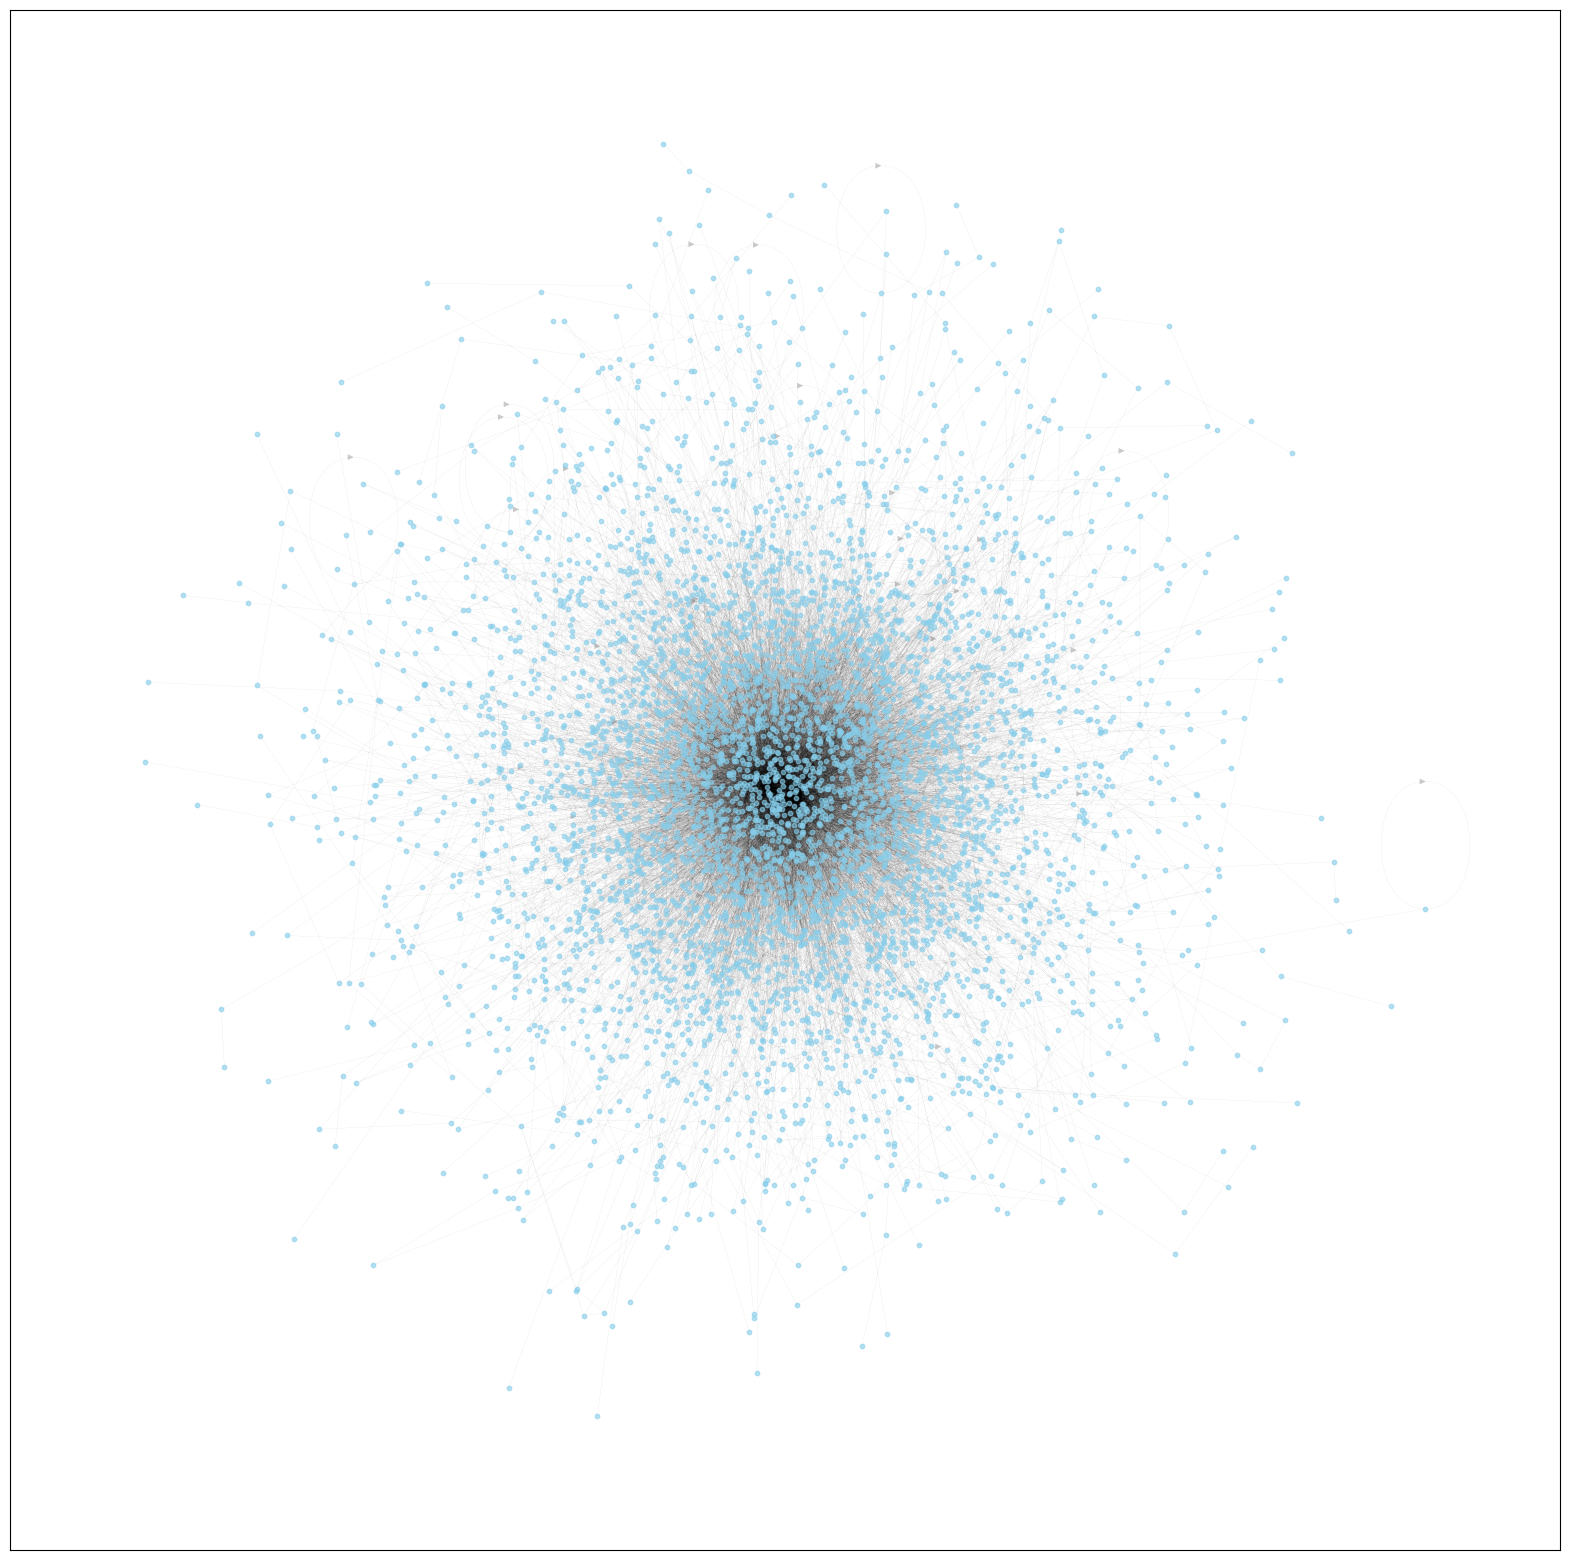

In [ ]:
plt.figure(figsize=(20, 20))


pos = nx.spring_layout(G_draw, k=0.5, iterations=50)

nx.draw_networkx_nodes(G_draw, pos, node_size=10, node_color='skyblue', alpha=0.6)


nx.draw_networkx_edges(G_draw, pos, width=0.1, alpha=0.2, arrows=False)


#nx.draw_networkx_labels(G_draw, pos, font_size=12, font_weight='bold')

plt.show()

Vizuelizacijom mrežne strukture identifikovana je najveća povezana komponenta (jedan njen podgraf). Fokusiranjem na ovu komponentu eliminisane su periferne, izolovane interakcije i analiziran je centralni prostor u kojem se odvijala glavna javna rasprava.

In [ ]:
G_un = G_giant.to_undirected()

G_un.remove_edges_from(nx.selfloop_edges(G_un))

core_un = nx.k_core(G_un, k=5)
core_nodes = core_un.nodes()

G_core = G_giant.subgraph(core_nodes).copy()
#G_core = nx.k_core(G_un, k=5)

print(type(G_core))
print(f"Čvorova u jezgru: {G_core.number_of_nodes()}")
print(f"Grana u jezgru: {G_core.number_of_edges()}")

<class 'networkx.classes.digraph.DiGraph'>
Čvorova u jezgru: 833
Grana u jezgru: 4464


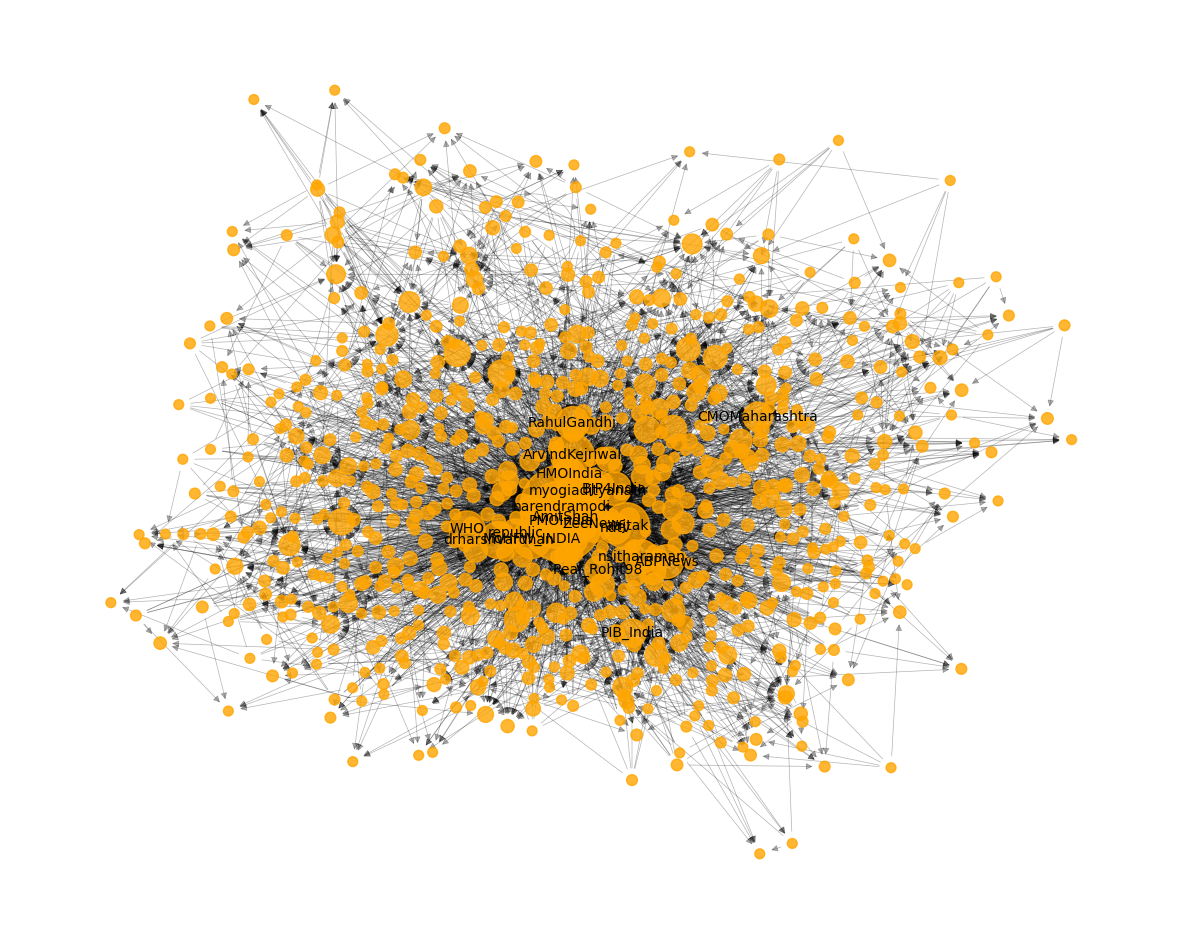

In [ ]:
plt.figure(figsize=(15, 12))

pos = nx.spring_layout(G_core, k=1.5, iterations=100, scale=2)

d = dict(G_core.degree)
nx.draw_networkx_nodes(G_core, pos,
                       node_size=[v * 10 for v in d.values()],
                       node_color='orange',
                       alpha=0.8)

nx.draw_networkx_edges(G_core, pos, width=0.5, alpha=0.3)

top_nodes = sorted(d, key=d.get, reverse=True)[:20]
labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(G_core, pos, labels=labels, font_size=10)

plt.axis('off')
plt.show()

Kako bi se dodatno smanjila veličina mreže, primenjena je tehnika k-core dekompozicije sa parametrom k=5. Ovim postupkom iz mreže su uklonjeni periferni čvorovi sa malim brojem interakcija, čime je fokus prebačen na jezgro mreže koje čine najaktivniji korisnici.

Mere centralnosti:

In [ ]:
in_degree_centrality = nx.in_degree_centrality(G_core)
out_degree_centrality = nx.out_degree_centrality(G_core)

top_in = sorted(
    in_degree_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)[:10]

top_out = sorted(
    out_degree_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)[:10]



print("Čvorovi po in-degree centralnosti:",top_in)
print("Čvorovi po out-degree centralnosti:",top_out)

Čvorovi po in-degree centralnosti: [('narendramodi', 0.43870192307692313), ('PMOIndia', 0.4074519230769231), ('AmitShah', 0.18509615384615385), ('aajtak', 0.13221153846153846), ('myogiadityanath', 0.12139423076923078), ('ArvindKejriwal', 0.11778846153846155), ('MoHFW_INDIA', 0.09615384615384616), ('drharshvardhan', 0.08533653846153846), ('WHO', 0.08293269230769232), ('ZeeNews', 0.08293269230769232)]
Čvorovi po out-degree centralnosti: [('Real_Rohit98', 0.04567307692307693), ('shashank088', 0.04326923076923077), ('NewIndiaOff', 0.037259615384615384), ('Dev58554643', 0.028846153846153848), ('raahat25236487', 0.02764423076923077), ('DrKapilKakar', 0.026442307692307696), ('immiiAsh', 0.025240384615384616), ('SinghSatyjeet', 0.02403846153846154), ('rajeshbaniya', 0.02403846153846154), ('jatinder_vir', 0.022836538461538464)]


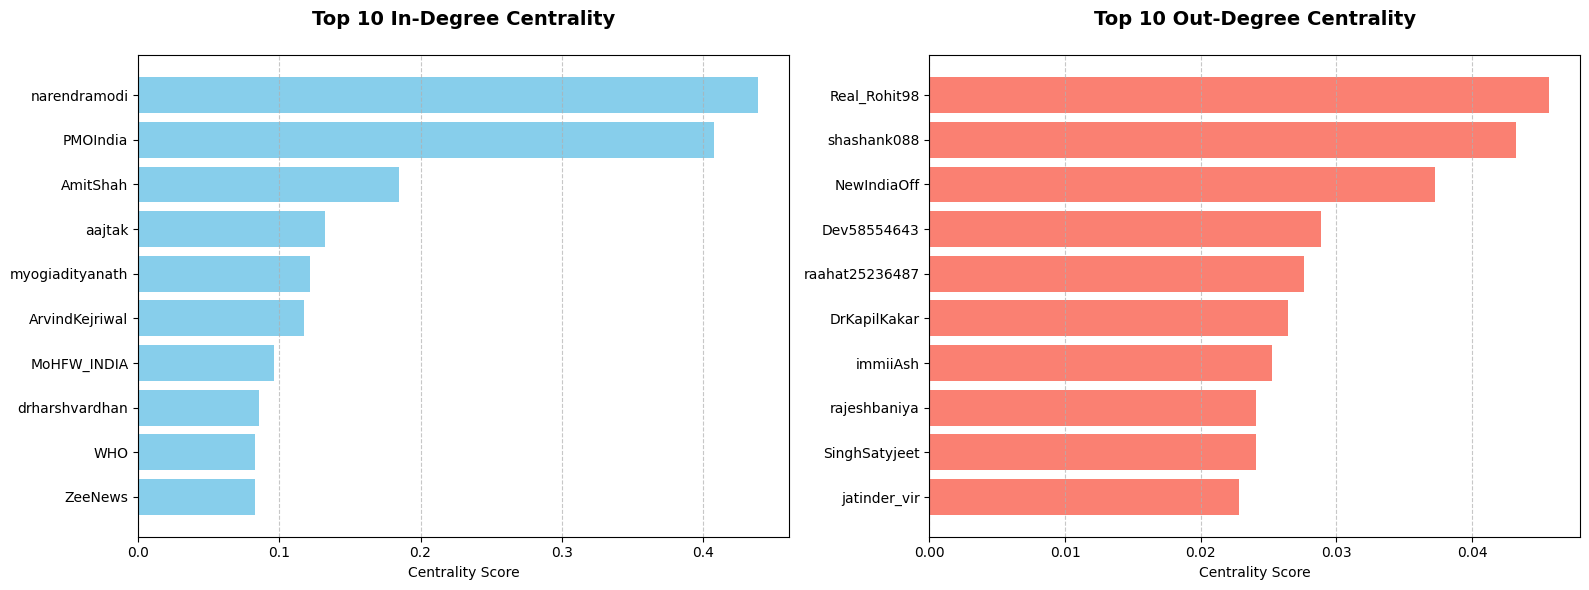

In [ ]:
 #Uzeto top 10 rezultata
top_in_df = pd.DataFrame(top_in, columns=['User', 'Score'])
top_out_df = pd.DataFrame(top_out, columns=['User', 'Score'])

#Sortiranje, da bi na grafiku najviši bio gore
top_in_df = top_in_df.sort_values(by='Score', ascending=True)
top_out_df = top_out_df.sort_values(by='Score', ascending=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#In-degree grafik
ax1.barh(top_in_df['User'], top_in_df['Score'], color='skyblue')
ax1.set_title('Top 10 In-Degree Centrality\n', fontsize=14, fontweight='bold')
ax1.set_xlabel('Centrality Score')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

#Out-degree grafik
ax2.barh(top_out_df['User'], top_out_df['Score'], color='salmon')
ax2.set_title('Top 10 Out-Degree Centrality\n', fontsize=14, fontweight='bold')
ax2.set_xlabel('Centrality Score')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Ovde je predstavljena centralnost stepena, a konkretno pošto je u pitanju usmerena mreža razlikujemo in-degree i out-degree. Na iscrtanim graficima možemo primetiti da najviši in-degree rezultat ide do  0.43 (@narendramodi). To znači da ga pominje skoro polovina aktivnog jezgra mreže. S druge strane,  najviši out-degree rezultat je samo oko 0.04 (@Real_Rohit98). U mrežama sa koordinisanim ponašanjem namenjenim "spamovanju", out-degree skorovi bi bili ekstremno visoki jer profili sa automatizovanim ponašanjem imaju zadatak da taguju što više ljudi u kratkom vremenu. Iz svega navedenog na osnovu ove mere centralnosti možemo zaključiti da je mreža hijerarhijska, gde se hiljade običnih ljudi obraća nekolicini lidera, što je prirodno ponašanje tokom nacionalne krize (lockdown-a), ali treba proveriti i ostale pokazatelje.

In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00


In [ ]:
in_deg_cent = nx.in_degree_centrality(G_core)
out_deg_cent = nx.out_degree_centrality(G_core)

in_thr = sorted(in_deg_cent.values(), reverse=True)[10]
out_thr = sorted(out_deg_cent.values(), reverse=True)[10]

In [ ]:
from pyvis.network import Network

net = Network(
    height="800px",
    width="100%",
    bgcolor="#ffffff",
    font_color="black",
    directed=True
)

net.barnes_hut()

In [ ]:
for node in G_core.nodes():
    in_c = in_deg_cent[node]
    out_c = out_deg_cent[node]

    size = 15 + out_c * 800
    title = f"""
    Node: {node}<br>
    In-degree centrality: {in_c:.4f}<br>
    Out-degree centrality: {out_c:.4f}
    """

    #boje
    if in_c >= in_thr:
        color = "red"       #autoritet
    elif out_c >= out_thr:
        color = "blue"      #hub
    else:
        color = "lightgray"

    net.add_node(
        node,
        label=node if in_c >= in_thr or out_c >= out_thr else "",
        size=size,
        color=color,
        title=title
    )

In [ ]:
for source, target in G_core.edges():
    net.add_edge(
        source,
        target,
        color="rgba(150,150,150,0.3)"
    )

In [ ]:
net.show("twitter_core_pyvis.html", notebook=False)

twitter_core_pyvis.html


Prikazana slika predstavlja jezgro Twitter mreže, vizualizovano korišćenjem PyVis biblioteke za interaktivni prikaz grafova. Čvorovi mreže označeni su različitim bojama i veličinama prema svojoj centralnosti: crveni čvorovi predstavljaju autoritete sa visokom in-degree centralnošću, dok plavi čvorovi predstavljaju hubove sa visokom out-degree centralnošću. Sivi čvorovi su manje centralni korisnici. Veličina čvorova proporcionalna je out-degree vrednosti, što vizuelno ističe hubove. Veze između čvorova su svetlo sive i polu providne, što omogućava preglednost i prikazuje gustu i kompleksnu mrežnu strukturu.



In [ ]:
#Betweenness Centrality (Mera posredništva)
betweenness = nx.betweenness_centrality(G_core)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 brokera (Betweenness):", top_betweenness)

Top 10 brokera (Betweenness): [('ImRaina', 1.5909932426177915e-05), ('rajivgoyal', 1.3017217439600111e-05), ('amitabhnews18', 1.157085994631121e-05), ('bbbehera52', 1.157085994631121e-05), ('MLMANDOWARA', 8.678144959733408e-06), ('SakalMediaNews', 7.231787466444506e-06), ('colkt', 7.231787466444506e-06), ('AshBiswal', 5.785429973155605e-06), ('priyagupta999', 5.785429973155605e-06), ('borana_borana', 5.785429973155605e-06)]


In [ ]:
#Lista svih profila čiji je Betweenness score tačno 0
zero_betweenness = [node for node, score in betweenness.items() if score == 0]

print(f"Broj profila sa Betweenness 0: {len(zero_betweenness)}")

#Out-Degree score samo za te profile
zero_bet_out_scores = {node: out_deg_cent[node] for node in zero_betweenness}

#Sortiranje
suspects = sorted(zero_bet_out_scores.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 profila sa Betweenness 0 i najvećim Out-Degree (Potencijalni spammeri):")
for profile, score in suspects:
    print(f"Profil: {profile}, Out-Degree: {score:.4f}")

Broj profila sa Betweenness 0: 821
Top 10 profila sa Betweenness 0 i najvećim Out-Degree (Potencijalni spammeri):
Profil: Real_Rohit98, Out-Degree: 0.0457
Profil: shashank088, Out-Degree: 0.0433
Profil: NewIndiaOff, Out-Degree: 0.0373
Profil: Dev58554643, Out-Degree: 0.0288
Profil: raahat25236487, Out-Degree: 0.0276
Profil: DrKapilKakar, Out-Degree: 0.0264
Profil: immiiAsh, Out-Degree: 0.0252
Profil: rajeshbaniya, Out-Degree: 0.0240
Profil: SinghSatyjeet, Out-Degree: 0.0240
Profil: PranavJayade, Out-Degree: 0.0228


Analiza centralnosti posredništva (betweenness centrality) otkrila nam je specifičnu strukturu mreže. Rezultati pokazuju veoma niske vrednosti (čak 821 profil od ukupno 833 ima centralnost posredništva jednaku nuli), što ukazuje na to da je komunikacija pre svega direktna ka centralnim autoritetima, bez postojanja dominantnih čvorišta koja bi kontrolisala protok vesti. Iako u literaturi piše da ova mera i treba da ima male vrednosti, s obzirom da su automatizovani profili pre svega namenjeni brzom rasprostranjivanju poruka i visokoj angažovanosti, smatram da u ovom konkretnom primeru i na ovom datasetu to nije slučaj. Razlog zbog kog to mislim jeste taj da kod koordinisanih mreža niska centralnost posredništva obično dolazi u paru sa mnogo višim out-degree skorom, dok su u našem jezgru čak i profili sa betweenness skorom nula zadržali niske i umerene vrednosti out-degree centralnosti.

Treba imati u vidu da je i ova metrika centralnosti računata na usmerenom grafu, čime je očuvana priroda Twitter interakcija (od autora tvita ka pomenutom). Ovo je važno napomenuti, jer upravo objašnjava niske vrednosti kod većine korisnika i potvrđuje asimetričnost komunikacije.

In [ ]:
#Closeness Centrality (Mera bliskosti)
closeness = nx.closeness_centrality(G_core)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 profila - OUT Closeness:", top_closeness)

Top 10 profila - OUT Closeness: [('narendramodi', 0.43873108024051416), ('PMOIndia', 0.40753802071853645), ('AmitShah', 0.18512658227848103), ('aajtak', 0.13222226991758243), ('myogiadityanath', 0.12177714431586112), ('ArvindKejriwal', 0.11789247411242604), ('MoHFW_INDIA', 0.09616850375234522), ('drharshvardhan', 0.08535300316122234), ('WHO', 0.08294962080173349), ('ZeeNews', 0.0829326923076923)]


In [ ]:
G_rev = G_core.reverse(copy=True)

in_closeness = nx.closeness_centrality(G_rev)

top_in_closeness = sorted(
    in_closeness.items(),
    key=lambda x: x[1],
    reverse=True
)[:10]

print("Top 10 profila – IN-closeness:", top_in_closeness)

Top 10 profila – IN-closeness: [('Real_Rohit98', 0.04567307692307692), ('shashank088', 0.04326923076923077), ('NewIndiaOff', 0.04040646853146853), ('Dev58554643', 0.028846153846153848), ('raahat25236487', 0.027644230769230768), ('DrKapilKakar', 0.026442307692307692), ('TenNewsDotIn', 0.026177884615384617), ('immiiAsh', 0.025240384615384616), ('rajeshbaniya', 0.02403846153846154), ('SinghSatyjeet', 0.02403846153846154)]


Rezultati pokazuju da najviši closeness skor ostvaruju nalozi poput @narendramodi (0.438), @PMOIndia (0.407) i @Real_Rohit98(0.046). U teoriji mrežne analize, visoka out closeness znači da čvor može lako dosegnuti druge, dok za in closeness važi da drugi čvorovi mogu doći lako do posmatranog čvora.

S obzirom na literaturu koja navodi da i obični korisnici i potpuno automatizovani korisnici često imaju tendenciju da budu bliži i vidljiviji ostatku mreže i sposobni da brzo utiču na nju, ovde se moram osvrnuti na kontekst. Naime, kada se uporede vrednosti in i out closeness vidimo da više vrednosti i to upravo za out closeness, pripadaju isključivo verifikovanim institucijama i liderima. Njihova bliskost ne potiče od agresivnog spamovanja, već od činjenice da im se ogroman broj građana/običnih korisnika direktno obraća, a to nam pokazuje njihova in-degree metrika. Ti čvorovi imaju ograničenu ili čak nepostojeću izlaznu aktivnost, ali ipak ostvaruju visoku bliskost usled činjenice da se veliki broj najkraćih puteva u mreži završava upravo na njima. Za profile sa najvišom in closeness, možemo reći da do njih dolazi vrlo mali broj čvorova, što potvrđuje dosadašnju tezu da ni ovi profili nemaju koordinisano ponašanje.

Detekcija zajednica u mreži:

In [ ]:
!pip install leidenalg
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 110.8 MB/s eta 0:00:00


In [ ]:
#Globalni koeficijent klasterizacije (Tranzitivnost)
transitivity = nx.transitivity(G_core)
print(f"Globalni koeficijent klasterizacije (Transitivity): {transitivity:.4f}")

#Prosečni lokalni koeficijent klasterizacije
avg_clustering = nx.average_clustering(G_core)
print(f"Prosečni lokalni koeficijent klasterizacije: {avg_clustering:.4f}")

Globalni koeficijent klasterizacije (Transitivity): 0.0008
Prosečni lokalni koeficijent klasterizacije: 0.0016


Pre nego što pronađemo zajednice u mreži neopodno je izračunati indikatore povezanosti mreže. Gustina mreže ranije je izračunata, dok ovde vidimo vrednosti za lokalni i globalni koeficijent klasterizacije.

Niska vrednost globalnog koeficijenta klasterovanja ukazuje da mreža ima slab nivo zatvorenih direkcionih struktura, koje su u direkcionim mrežama često retke. Takođe, niska vrednost lokalnog koeficijenta sugeriše da interakcije među čvorovima imaju pretežno hijerarhijski karakter.

Ovakvi nalazi, u kombinaciji sa rezultatima analize centralnosti (betweenness centralnost, ulazni i izlazni stepen), ne ukazuju na postojanje visoko koordinisanih ili centralno kontrolisanih naloga, što dodatno podržava pretpostavku da u posmatranoj mreži nema izraženog automatizovanog ponašanja.

In [ ]:
import networkx as nx
import igraph as ig
import leidenalg as la
from networkx.algorithms.community import modularity

#Konverzija iz NetworkX (G_core) u igraph format
#Leiden algoritam radi sa igraph objektima
iG = ig.Graph.from_networkx(G_core)

#Primena Leiden algoritma (na usmerenom grafu)
partition = la.find_partition(iG, la.RBConfigurationVertexPartition, weights=None)

#Vraćanje rezultata u NetworkX format
leiden_communities = []
for community in partition:
    node_names = [iG.vs[node_index]['_nx_name'] for node_index in community]
    leiden_communities.append(set(node_names))

#Izračunavanje modularnosti (koristeći NetworkX funkciju)
mod_score = modularity(G_core, leiden_communities)

print(f"Pronađeno zajednica (Leiden): {len(leiden_communities)}")
print(f"Modularnost grafa: {mod_score:.4f}")

#Prikaz najvećih zajednica
for i, comm in enumerate(sorted(leiden_communities, key=len, reverse=True)[:3]):
    print(f"Zajednica {i} ({len(comm)} članova): {list(comm)[:10]}...")

Pronađeno zajednica (Leiden): 13
Modularnost grafa: 0.3611
Zajednica 0 (142 članova): ['TahaAnsari03', 'abhi795', 'ashutosh83B', 'Hardik_Nik', 'ManishBajpaiBjp', 'ap_82', 'DR_DINESH_GUPTA', 'ndtvindia', 'sunair10', 'pkroy0077']...
Zajednica 1 (98 članova): ['SatyanarayanT17', 'Ashu_k_singh', 'shwetaberry', 'ranjanas89', 'SR_2789', 'AskAnshul', 'Ervikram44Kumar', 'aksingh029', 'RohitDa29783574', 'cnnbrk']...
Zajednica 2 (82 članova): ['vidhibharatipar', 'nitinshankar', 'PREMKUM14299724', 'im_sam007', 'Sanjays81301051', 'MEAIndia', 'Shivani90923419', 'CRajiva', 'NANIPV', 'HRDMinistry']...


Kako bih identifikovala zajednice u mreži koristila sam Leiden algoritam, jer on može da se primeni na usmerenim grafovima. Modularnost celog grafa iznosi 0.3658, a kako vrednosti ove metode koje se nalaze u rasponu od 0.3 do 0.7 ukazuju na jaku strukturu zajednice sa više ivica unutar same zajednice, onda to mogu zaključiti da važi isto i na trenutnom primeru.

In [ ]:
from pyvis.network import Network
import matplotlib.colors as mcolors
import random


all_colors = list(mcolors.CSS4_COLORS.values())
random.shuffle(all_colors)

#Mapiranje čvorova na njihove zajednice
node_to_community = {}
for i, community in enumerate(leiden_communities):
    for node in community:
        node_to_community[node] = i

#Kreiranje PyVis mreže
net = Network(height="800px", width="100%", bgcolor="#ffffff", font_color="black", directed=True)

#Dodavanje čvorova
for node in G_core.nodes():
    comm_id = node_to_community.get(node, 0)
    color = all_colors[comm_id % len(all_colors)]

    #Veličina čvora zavisi od in-degree centralnosti (popularnosti)
    size = 10 + (in_deg_cent.get(node, 0) * 150)

    net.add_node(node,
                 label=node,
                 title=f"Korisnik: {node}\nZajednica: {comm_id + 1}",
                 color=color,
                 size=size)

#Dodavanje ivica
for source, target in G_core.edges():
    net.add_edge(source, target, color='#e5e5e5', arrowStrikethrough=False)

net.set_options("""
var options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -20000,
      "centralGravity": 0.3,
      "springLength": 95
    },
    "minVelocity": 0.75
  }
}
""")

#Čuvanje u HTML fajl
net.show("leiden_zajednice_vizuelizacija.html", notebook=False)

leiden_zajednice_vizuelizacija.html


Ovde je ponovo iskorišćena PyVis biblioteka. Boje čvorova odgovaraju različitim zajednicama otkrivenim algoritmom, omogućavajući vizuelno prepoznavanje grupacija unutar mreže, dok veličina čvora proporcionalno odražava njegovu in-degree centralnost, tj. popularnost ili uticaj u okviru mreže. Fizika mreže je podešena tako da se čvorovi rasporede pregledno, čime se smanjuje preklapanje i olakšava analiza međusobnih veza i strukture zajednica. Rezultat je interaktivna HTML vizualizacija.

In [ ]:
from pyvis.network import Network
import networkx as nx
import matplotlib.colors as mcolors
import random

G_agg = nx.Graph()

#Dodavanje čvorova (zajednice)
for i, community in enumerate(leiden_communities):
    G_agg.add_node(i, size=len(community))  #size = broj čvorova u zajednici

# Mapiranje originalni čvor -> zajednica
node_to_community = {}
for i, community in enumerate(leiden_communities):
    for node in community:
        node_to_community[node] = i

#Dodavanje ivica između zajednica
for u, v in G_core.edges():
    cu = node_to_community[u]
    cv = node_to_community[v]

    if cu != cv:
        if G_agg.has_edge(cu, cv):
            G_agg[cu][cv]["weight"] += 1
        else:
            G_agg.add_edge(cu, cv, weight=1)

#Mreža
net = Network(height="800px", width="100%", bgcolor="#ffffff", notebook=True)

#Boje za zajednice
colors = list(mcolors.CSS4_COLORS.values())
random.shuffle(colors)

#Dodavanje čvorova
for node, data in G_agg.nodes(data=True):
    net.add_node(
        node,
        label=f"Zajednica {node}",
        title=f"Broj čvorova: {data['size']}",
        size=10 + data["size"],
        color=colors[node % len(colors)]
    )

#Dodavanje ivica
for u, v, data in G_agg.edges(data=True):
    net.add_edge(
        u,
        v,
        value=data["weight"],
        title=f"Broj veza: {data['weight']}"
    )

net.set_options("""
{ "physics": {
  "barnesHut": {
    "gravitationalConstant": -4500,
    "centralGravity": 0.05,
    "springLength": 220,
    "springConstant": 0.01 },
    "minVelocity": 0.01 }
     } """)


net.show("leiden_agregirani_graf_12_zajednica.html", notebook=False)


leiden_agregirani_graf_12_zajednica.html


In [ ]:
top_in_degree = [
    'narendramodi', 'PMOIndia', 'AmitShah', 'aajtak',
    'myogiadityanath', 'ArvindKejriwal', 'MoHFW_INDIA',
    'drharshvardhan', 'WHO', 'ZeeNews'
]

top_out_degree = [
    'Real_Rohit98', 'shashank088', 'NewIndiaOff', 'Dev58554643',
    'raahat25236487', 'DrKapilKakar', 'immiiAsh',
    'SinghSatyjeet', 'rajeshbaniya', 'PranavJayade'
]

community_0 = set(leiden_communities[0])

in_deg_in_c0 = [u for u in top_in_degree if u in community_0]
out_deg_in_c0 = [u for u in top_out_degree if u in community_0]

print("Top IN-degree u zajednici 0:", in_deg_in_c0)
print("Top OUT-degree u zajednici 0:", out_deg_in_c0)


Top IN-degree u zajednici 0: ['narendramodi', 'PMOIndia', 'AmitShah', 'ArvindKejriwal']
Top OUT-degree u zajednici 0: []


Agregirani graf prikazuje strukturu mreže na drugačiji način. Ovde svaki čvor predstavlja jednu Leiden zajednicu, njegova veličina odgovara broju korisnika u zajednici, dok ivice i njihove težine (debljine) odražavaju intenzitet interakcija između zajednica. Možemo primetiti da je zajednica sa najvećim brojem čvorova zajednica 0 (153 čvora), a takođe ona ostvaruje i najveću povezanost sa svim ostalim zajednicama. Moguće je da najveća povezanost zajednice 0 proizilazi iz činjenice da se u njoj nalazi najveći broj profila sa visokim vrednostima in-degree centralnosti, odnosno profila koje drugi korisnici iz različitih zajednica pominju, što dovodi do ostvarivanja jakih veza.

In [ ]:
#Sabiranje retvitova
profile_retweets = data_lockdown.groupby('user_screen_name')['retweet_count'].sum().sort_values(ascending=False)

print(profile_retweets.head(10))

user_screen_name
ImRaina            22549
rajansi45           1771
deepak_mragwani     1609
vikrantgupta73       798
AshramBlr            676
rais_shk             666
sanghaviharsh        644
Francis_Joseph       453
gunjakapoor          445
MandviSharma         414
Name: retweet_count, dtype: int64


In [ ]:
#Top 10 profila po ukupnom broju retvitova
top_10_rt = profile_retweets.head(10)

#Prolaz kroz listu i izvlačenje In-degree iz rečnika in_degree_centrality
for profile, RT_sum in top_10_rt.items():
    #Provera da li je profil u G_core grafu
    in_cent = in_degree_centrality.get(profile, "Nije u jezgru (G_core)")

    if isinstance(in_cent, float):
        print(f"Profil: {profile:15} | Ukupno RT: {RT_sum:6} | In-degree: {in_cent:.4f}")
    else:
        print(f"Profil: {profile:15} | Ukupno RT: {RT_sum:6} | In-degree: {in_cent}")

Profil: ImRaina         | Ukupno RT:  22549 | In-degree: 0.0084
Profil: rajansi45       | Ukupno RT:   1771 | In-degree: Nije u jezgru (G_core)
Profil: deepak_mragwani | Ukupno RT:   1609 | In-degree: 0.0000
Profil: vikrantgupta73  | Ukupno RT:    798 | In-degree: Nije u jezgru (G_core)
Profil: AshramBlr       | Ukupno RT:    676 | In-degree: Nije u jezgru (G_core)
Profil: rais_shk        | Ukupno RT:    666 | In-degree: Nije u jezgru (G_core)
Profil: sanghaviharsh   | Ukupno RT:    644 | In-degree: Nije u jezgru (G_core)
Profil: Francis_Joseph  | Ukupno RT:    453 | In-degree: Nije u jezgru (G_core)
Profil: gunjakapoor     | Ukupno RT:    445 | In-degree: Nije u jezgru (G_core)
Profil: MandviSharma    | Ukupno RT:    414 | In-degree: Nije u jezgru (G_core)


In [ ]:
for profile, RT_sum in top_10_rt.items():
    out_cent = out_degree_centrality.get(profile, "Nije u jezgru (G_core)")

    if isinstance(out_cent, float):
        print(f"Profil: {profile:15} | Ukupno RT: {RT_sum:6} | OUT-degree: {out_cent:.4f}")
    else:
        print(f"Profil: {profile:15} | Ukupno RT: {RT_sum:6} | OUT-degree: {out_cent}")

Profil: ImRaina         | Ukupno RT:  22549 | OUT-degree: 0.0036
Profil: rajansi45       | Ukupno RT:   1771 | OUT-degree: Nije u jezgru (G_core)
Profil: deepak_mragwani | Ukupno RT:   1609 | OUT-degree: 0.0144
Profil: vikrantgupta73  | Ukupno RT:    798 | OUT-degree: Nije u jezgru (G_core)
Profil: AshramBlr       | Ukupno RT:    676 | OUT-degree: Nije u jezgru (G_core)
Profil: rais_shk        | Ukupno RT:    666 | OUT-degree: Nije u jezgru (G_core)
Profil: sanghaviharsh   | Ukupno RT:    644 | OUT-degree: Nije u jezgru (G_core)
Profil: Francis_Joseph  | Ukupno RT:    453 | OUT-degree: Nije u jezgru (G_core)
Profil: gunjakapoor     | Ukupno RT:    445 | OUT-degree: Nije u jezgru (G_core)
Profil: MandviSharma    | Ukupno RT:    414 | OUT-degree: Nije u jezgru (G_core)


In [ ]:
count_zero_rt = (data_lockdown['retweet_count'] == 0).sum()

all_posts = len(data_lockdown)

procenat_nula_rt = (count_zero_rt / all_posts) * 100

print(f"Broj postova sa 0 retvitova: {count_zero_rt}")
print(f"Ukupan broj postova: {all_posts}")
print(f"Procenat postova bez retvitova: {procenat_nula_rt:.2f}%")

Broj postova sa 0 retvitova: 15823
Ukupan broj postova: 19328
Procenat postova bez retvitova: 81.87%


Dodatnom analizom popularnosti objave, možemo primetiti nešto malo drugačije. Konkretno profil čija objava je najviše puta retweetovana je @ImRaina. To je profil popularnog indijskog igrača kriketa (Suresh Raina), čija jedna objava dostiže najveću popularnost. Njegova vrednost in-degree znači da ga drugi korisnici masovno pominju u svojim tvitovima, a ogroman broj retvitova pokazuje da se njegove poruke šire organski jer je on javna ličnost sa milionskom bazom pratilaca.

Sa druge strane vidimo profil @deepak_mragwani, koji na svim svojim objavama (zajedno) u ovom datasetu ima značajan broj retweetova. Vrednost In-degree je jednaka nuli, dok on ipak ostvaruje povezanost sa drugim profilima, jer je Out-degree 0.0144. U literaturi se navodi da koordinisani profili pored visoke vrednosti Out-degree centralnosti uglavnom na objavama imaju i visok broj retweetova (zbog saradnje sa drugim automatizovanim profilima). Zbog toga je neophodno obratiti pažnju i možda izvršiti detaljniju analizu samog teksta objava ovog profila.

Zaključak:

Iako je poslednja analiza uočila izolovan slučaj asimetričnog ponašanja, mislim da ovaj primer ne menja opštu sliku o strukturi mreže. Otkriven sumnjiv nalog pokazuje marginalne vrednosti izlaznog stepena (npr. 0.0144), što je zanemarljivo u poređenju sa maksimalnim vrednostima u mreži koje dostižu i 0.4. Ovo sugeriše da, čak i ako postoji koordinisano delovanje, ono je po svom intenzitetu i dosegu daleko ispod nivoa koji bi mogao da značajno naruši prirodne tokove konverzacije. Osim toga analiza strukture mreže pokazuje da su tokovi komunikacije dominantno usmereni ka čvorovima koji predstavljaju institucije i zvanične aktere, što se jasno ogleda u visokoj in-degree centralnosti ovih čvorova. Indikatori poput distribucije mera centralnosti i stabilnosti Leiden zajednica jasno sugerišu da je digitalni prostor Indije tokom lockdown-a bio središte stvarne društvene dinamike.

Literatura:

[1] Scientific reports. A global comparison of social media bot and human characteristics. Preuzeto sa: https://www.nature.com/articles/s41598-025-96372-1

[2] ScienceDirect. Profiling users and bots in Twitter through social media analysis. Preuzeto sa: https://www.sciencedirect.com/science/article/pii/S0020025522010933

[3] Analiza društvenih mreža. Zajednice/grupe u mreži. Preuzeto sa: https://fonbgacrs.sharepoint.com/sites/online_nastava_oas_202526_i22046/Class%20Materials/Forms/AllItems.aspx?id=%2Fsites%2Fonline%5Fnastava%5Foas%5F202526%5Fi22046%2FClass%20Materials%2FSlides%2FCommunities%20%282025%29%2Epdf&parent=%2Fsites%2Fonline%5Fnastava%5Foas%5F202526%5Fi22046%2FClass%20Materials%2FSlides&p=true&ga=1

[4] StackOverflow. Community detection for large, directed graphs. Preuzeto sa: https://stackoverflow.com/questions/66279851/community-detection-for-large-directed-graphs

[5] NetworkX. Modularity. Preuzeto sa: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html

[6] Medium. Modularity score. Preuzeto sa: https://northernprotector.medium.com/modularity-score-6019955f0580